In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
xls = pd.ExcelFile('Online Customer Tiers.xlsx')
rfmscores = pd.read_excel(xls, 'Sheet1')
rfmscores.shape

(3921, 9)

In [75]:
rfmscores.head()

,Recency,Frequency,Monetary,R,F,M,Group,Score,Customer_Tier
0,325,1,77183.60,4,4,1,441,9,Silver
1,2,103,4196.01,1,1,1,111,3,Platinum
2,0,4596,33719.73,1,1,1,111,3,Platinum
3,3,199,4090.88,1,1,1,111,3,Platinum
4,3,59,942.34,1,2,2,122,5,Platinum


In [76]:
df = rfmscores
df.head()

,Recency,Frequency,Monetary,R,F,M,Group,Score,Customer_Tier
0,325,1,77183.60,4,4,1,441,9,Silver
1,2,103,4196.01,1,1,1,111,3,Platinum
2,0,4596,33719.73,1,1,1,111,3,Platinum
3,3,199,4090.88,1,1,1,111,3,Platinum
4,3,59,942.34,1,2,2,122,5,Platinum


In [77]:
#Don't want values <=0 in log transform for normalisation

def handle_neg_zero(num):
    if num <= 0:
        return 1
    else:
        return num
    
df['Recency'] = [handle_neg_zero(x) for x in df.Recency]
df['Monetary'] = [handle_neg_zero(x) for x in df.Monetary]

df2 = df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [78]:
df2.head()

,Recency,Frequency,Monetary
0,5.784,0.000,11.254
1,0.693,4.635,8.342
2,0.000,8.433,10.426
3,1.099,5.293,8.317
4,1.099,4.078,6.848


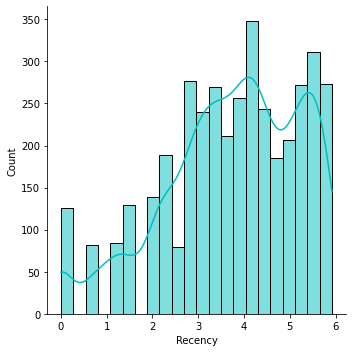

In [79]:
Recency_Plotted = df2['Recency']
ax = sns.displot(Recency_Plotted, kde=True, color='c')

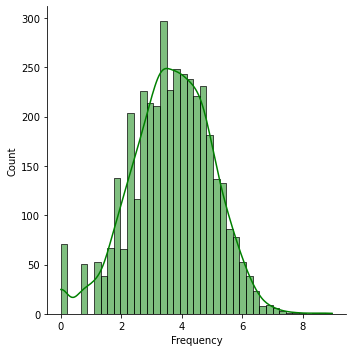

In [80]:
Frequency_Plotted = df2['Frequency']
ax = sns.displot(Frequency_Plotted, kde=True, color='g')

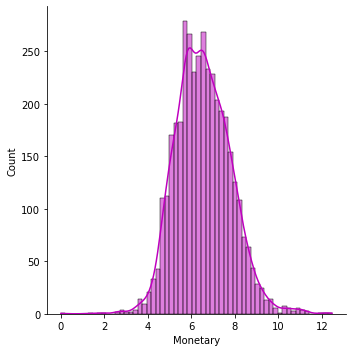

In [81]:
Monetary_Plotted = df2['Monetary']
ax = sns.displot(Monetary_Plotted, kde=True, color='m')

In [82]:
df2.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,3.733576,3.661318,6.541543
std,1.475344,1.339528,1.251338
min,0.000000,0.000000,0.000000
25%,2.833000,2.833000,5.704000
50%,3.912000,3.714000,6.480000
75%,4.956000,4.595000,7.363000
max,5.922000,8.968000,12.467000


In [83]:
scaler_obj=StandardScaler()
scaled_df=scaler_obj.fit_transform(df2)

scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df2.columns)

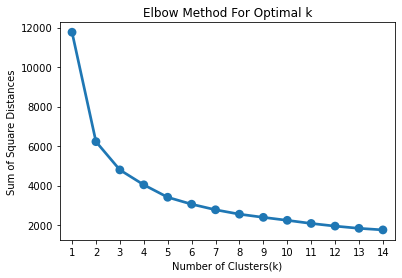

In [84]:

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(scaled_df)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [85]:
#k = 3, as per graph above, plotted using the elbow method

KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(scaled_df)

#Find clusters for the observation given in the dataset
df['Cluster'] = KMean_clust.labels_
df.head()


,Recency,Frequency,Monetary,R,F,M,Group,Score,Customer_Tier,Cluster
0,325,1,77183.60,4,4,1,441,9,Silver,2
1,2,103,4196.01,1,1,1,111,3,Platinum,1
2,1,4596,33719.73,1,1,1,111,3,Platinum,1
3,3,199,4090.88,1,1,1,111,3,Platinum,1
4,3,59,942.34,1,2,2,122,5,Platinum,1


<Figure size 504x504 with 0 Axes>

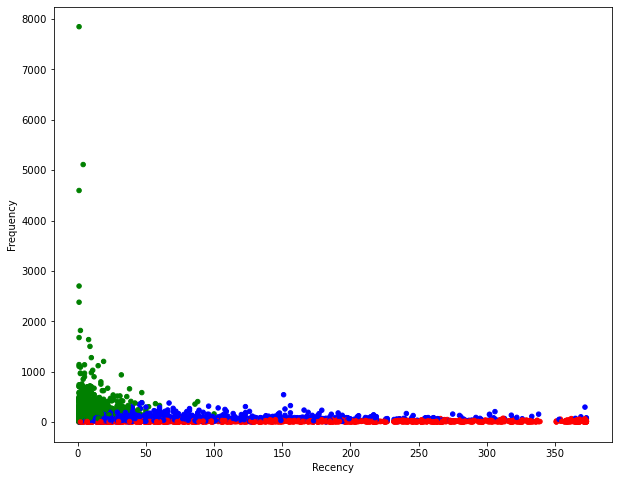

In [86]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
df['Color'] = df['Cluster'].map(lambda p: Colors[p])
ax = df.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = df['Color']
)

In [87]:
df.head()

,Recency,Frequency,Monetary,R,F,M,Group,Score,Customer_Tier,Cluster,Color
0,325,1,77183.60,4,4,1,441,9,Silver,2,blue
1,2,103,4196.01,1,1,1,111,3,Platinum,1,green
2,1,4596,33719.73,1,1,1,111,3,Platinum,1,green
3,3,199,4090.88,1,1,1,111,3,Platinum,1,green
4,3,59,942.34,1,2,2,122,5,Platinum,1,green


In [ ]:
#Green = Platinum cluster
#Blue = Silver & Gold cluster
#Red = Bronze cluster

In [88]:
df.to_excel('Clusters Final.xlsx', index = False)